## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [90]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [91]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [92]:
# 把兩個訓練資料集和測試資料集讀進來
df_train = pd.read_csv('Titanic_train.csv')
df_test = pd.read_csv('Titanic_test.csv')

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [93]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
for _ in df_train.columns:
    if _ not in df_test.columns:
        print(f'\"{_}\"欄位不在測試資料集\n')

"Survived"欄位不在測試資料集



## Q2: 測試資料集是否有遺失值?

In [94]:
#可以嘗試用範例的程式
print(df_test.isnull().any())
intCount = df_test.isnull().any().sum()
if intCount > 0:
    print(f'測試資料集有遺失值, 總共{intCount}個欄位有遺失值.')
else:
    print(f'測試資料集沒有遺失值.')

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
測試資料集有遺失值, 總共3個欄位有遺失值.


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [95]:
#合併資料
df = pd.concat([df_train, df_test])
display(df.head(3))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282


In [96]:
# 以 XXX 為例，先看 Cabin  出現值的特性
lCabin = df['Cabin'].unique()
print(f'Unique Cabin: {lCabin}\n')
missing = df['Cabin'].isnull().sum()
total = df['Cabin'].shape[0]
print(f'{missing} out of {total} Cabin values are missing data')


Unique Cabin: [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148' 'B45' 'B36' 'A21' 'D34' 'A9' '

Missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: Cabin2, dtype: int64


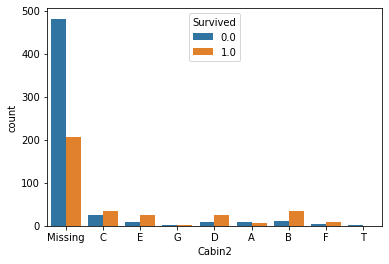

In [97]:
#補值前 平均值
# 連續型用分布圖行來看
df['Cabin2'] = df['Cabin'].apply(lambda x: 'Missing' if pd.isnull(x) else x[0])
print(df['Cabin2'].value_counts())
sns.countplot(df['Cabin2'], hue=df['Survived'])


C          401
B          321
D          200
E          180
F           92
A           89
G           21
Missing      3
T            2
Name: Cabin2, dtype: int64


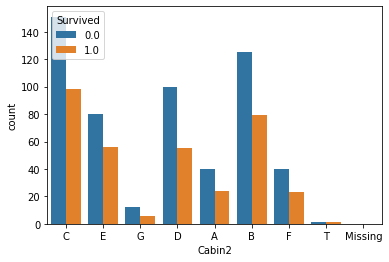

In [98]:
#由後往前補,補值後
df['Cabin2']=df['Cabin'].fillna(method='bfill')
df['Cabin2'] = df['Cabin2'].apply(lambda x: 'Missing' if pd.isnull(x) else x[0])
print(df['Cabin2'].value_counts())
sns.countplot(df['Cabin2'], hue=df['Survived'])


C          456
B          276
E          182
D          170
A          110
F           88
G           25
Missing      1
T            1
Name: Cabin3, dtype: int64


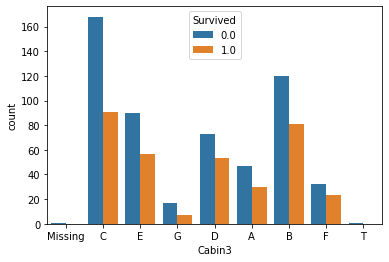

In [99]:
#由前往後補,補值後
df['Cabin3']=df['Cabin'].fillna(method='pad')
df['Cabin3'] = df['Cabin3'].apply(lambda x: 'Missing' if pd.isnull(x) else x[0])
print(df['Cabin3'].value_counts())
sns.countplot(df['Cabin3'], hue=df['Survived'])

In [ ]:
由前往後補, 比較平均，不像前兩個方法，集中在某一些值上面。